<a href="https://colab.research.google.com/github/matsonah/ClarkeStatsSpring2022/blob/main/Sum_of_Dice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data collected by rolling two dice and adding them up. 

In [ ]:
dice_rolls = c(6, 11, 3, 8 )  # actually roll two dice and add them at least ten times. Enter your data here. c(sum 1, sum 2, sum 3, sum 4, sum 5, ... , sum 10)
j=0 # We'll use this later. 
play=0 # We'll use this later. 

Saved those data in R and named the column "Sums of Dice" in a data set called dice_gathered. 

str(dice_gathered) checks the format of the file. 

In [ ]:
dice_gathered <- data.frame(dice_rolls)
names(dice_gathered) = c("Sums of Dice")
str(dice_gathered)

'data.frame':	4 obs. of  1 variable:
 $ Sums of Dice: num  6 11 3 8


Plot it for fun.

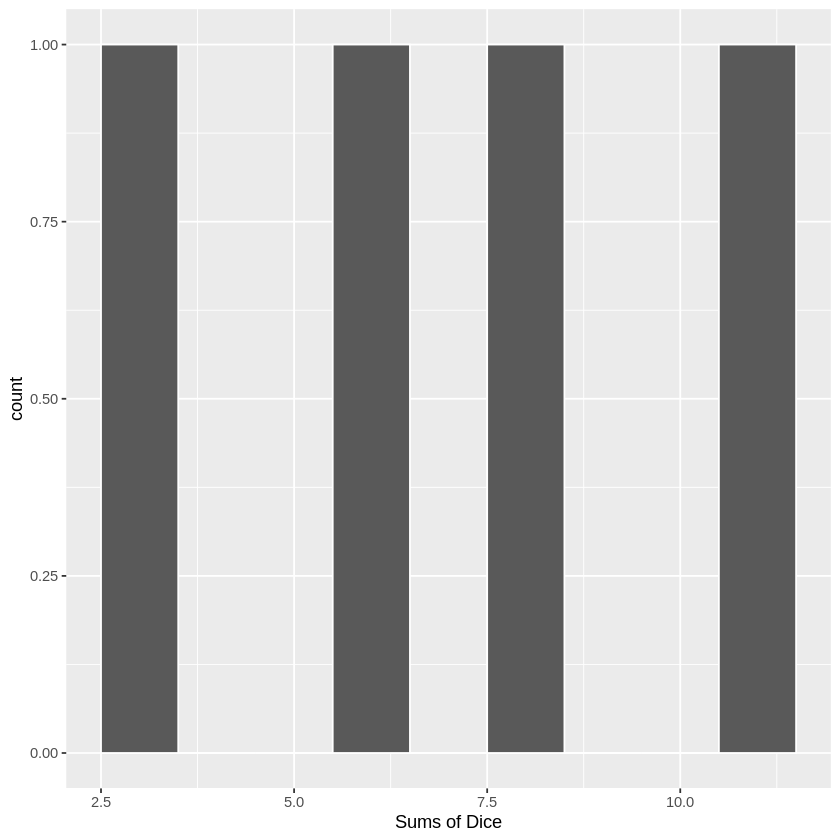

In [ ]:
library(ggplot2)   #only required the first time you call a ggplot. 
ggplot(
  dice_gathered, 
  aes(`Sums of Dice`)
  ) + 
  geom_histogram(
 #   aes(y=..density..),
    col="white",
    binwidth=1
    )

Pretend to roll dice and sum them a bunch of times.

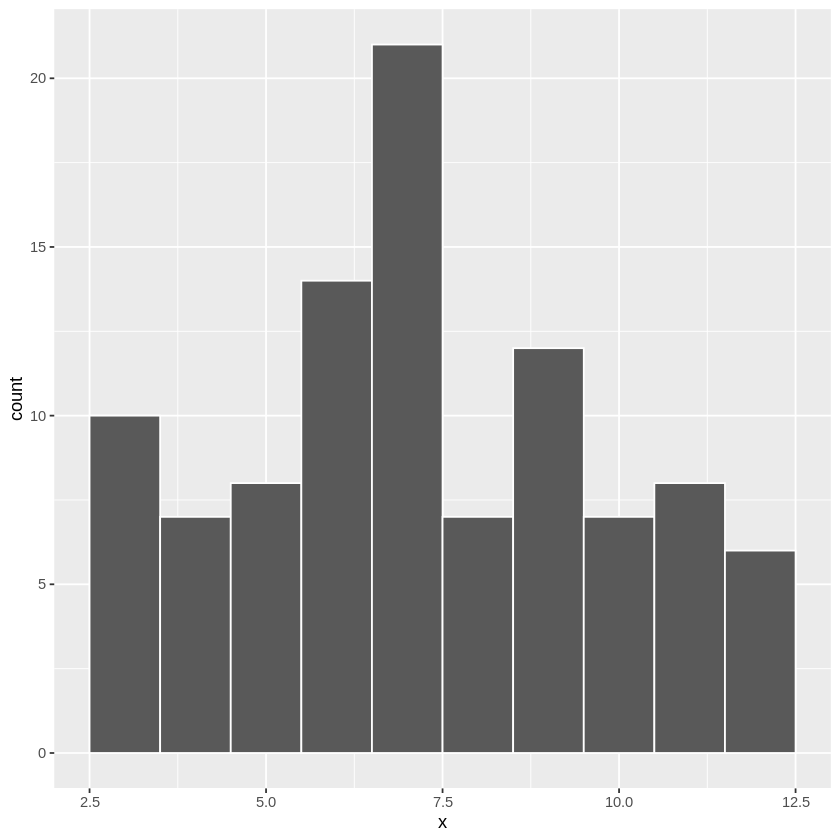

In [ ]:
#initialize dice_sums 
dice_sums <- 0 
num_rolls = 100    # pick a big number and replace 100 with your number. 

for(i in 1:num_rolls) {
  dice_sums[i] = sample(1:6,1)+sample(1:6,1)
}

dice_data <- data.frame(dice_sums)
names(dice_data) = c("x")

library(ggplot2)
ggplot(
  dice_data, 
  aes(x)
  ) + 
  geom_histogram(
#    aes(y=..density..),
    col="white",
    binwidth=1
    )

Same as before; however, this time switch the y-axis to report the proportion not the frequency. 

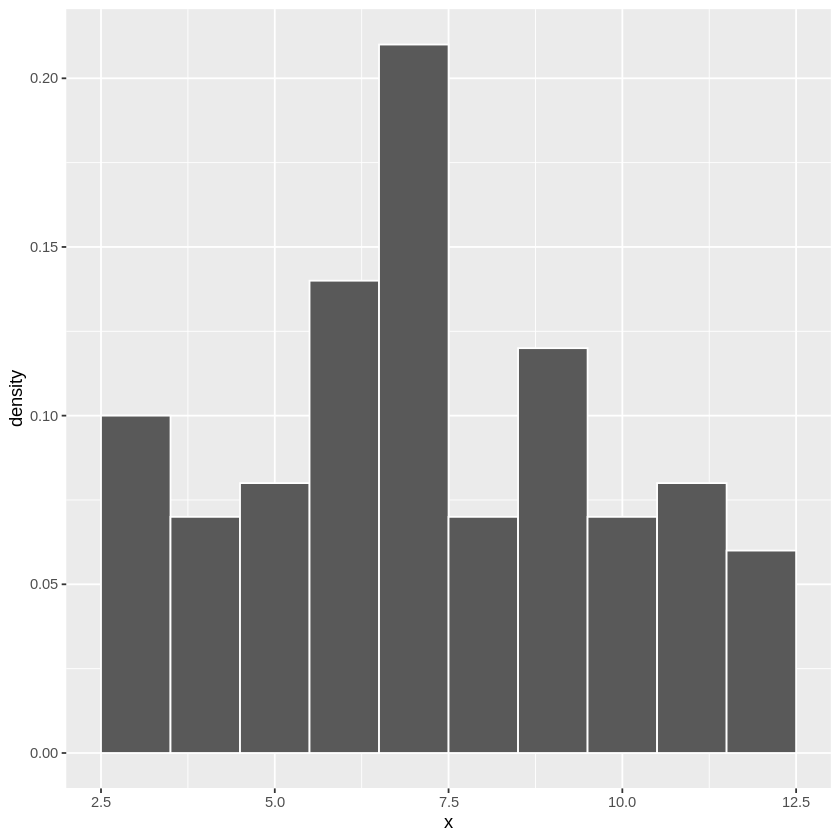

In [ ]:
# requires running the previous code block to initialize and generate dice_data.
ggplot(
  dice_data, 
  aes(x)
  ) + 
  geom_histogram(
    aes(y=..density..),
    col="white",
    binwidth=1
    )

Draw a normal curve for comparison. What happens as you increase the number of times you pretend to roll dice? 

(Initially, it's 100 times.) 

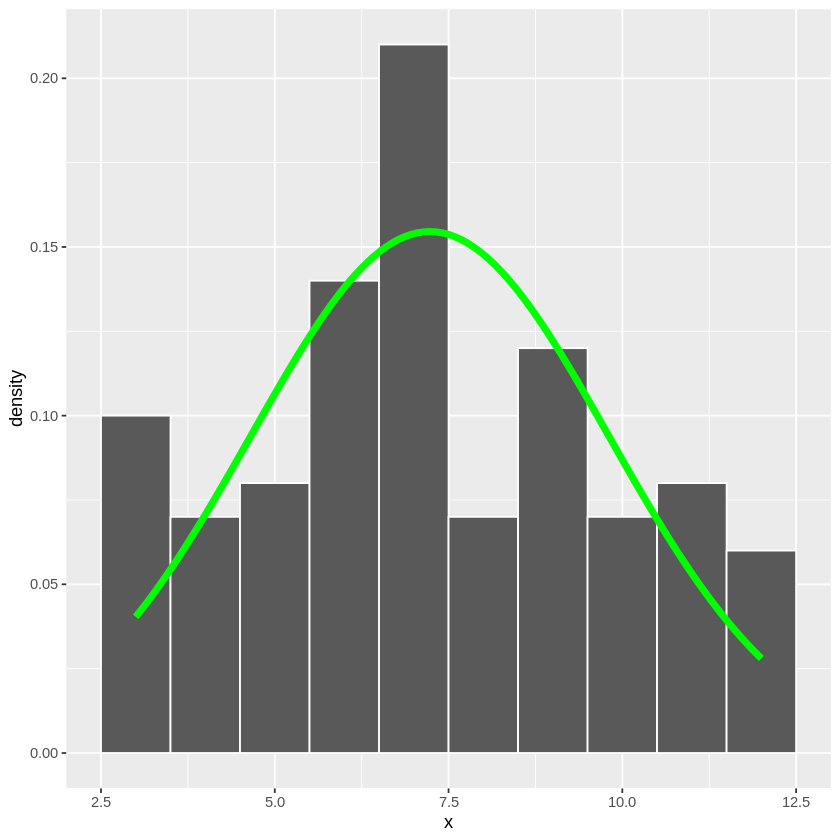

In [ ]:
# requires running the code block that initializes and generates dice_data.
ggplot(
  dice_data, 
  aes(x)
  ) + 
  geom_histogram(
    aes(y=..density..),
    col="white",
    binwidth=1
    ) + 
  stat_function(      #draws bell curve
    fun=dnorm, 
    args=list(
        mean=mean(dice_data$x), 
       sd=sd(dice_data$x)
        ), 
    col = "green", 
    size = 2
    )

Pause and investigate mean and standard deviations. 

The graph is the same as before. Now we construct verticle lines for the mean and each standard deviation out from the mean in both directions. 

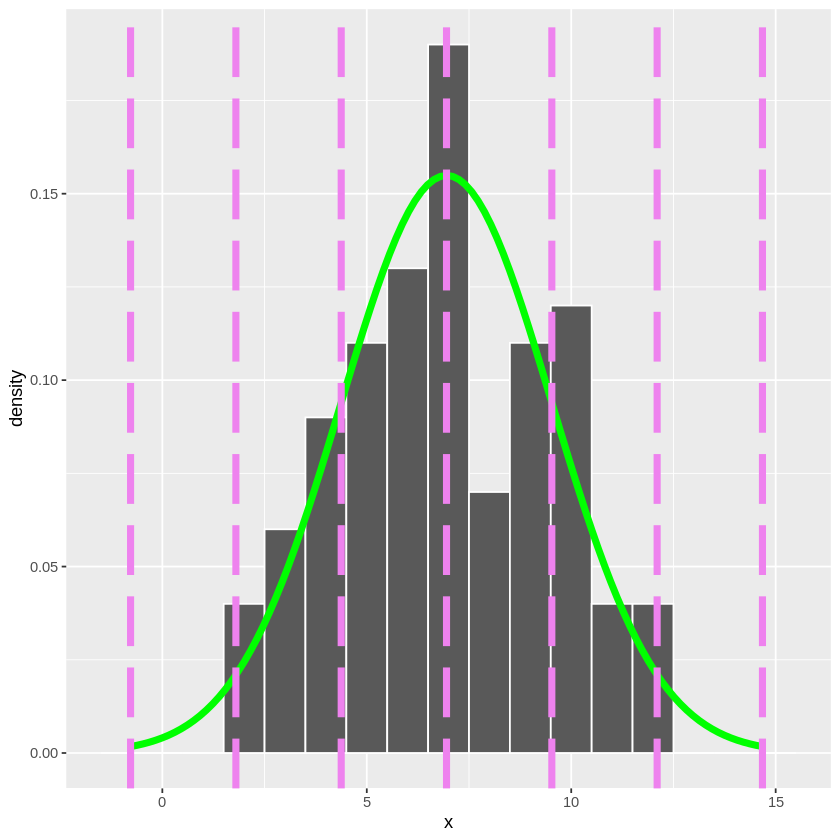

In [ ]:
# requires running the code block that initializes and generates dice_data.
sum_mean = mean(dice_data$x)
sum_sd=sd(dice_data$x)
sum_min=min(dice_data$x)
sum_max=max(dice_data$x) 

sum_left=0
sum_left[1]=sum_mean - 3*sum_sd #loads sum_left with the leftmost spot.

for(i in 1:6){
  sum_left[i+1]=sum_left[i]+sum_sd   #computes the next spot by going right one standard deviation and saves it in sum_left.
}

#sum_left[4] = NA   # optional code to remove the middle line (where the mean is). R will grumble a little as it counts from 1 to 7 and has to skip 4. 

ggplot(
  dice_data, 
  aes(x)
  ) + 
  geom_histogram(
    aes(y=..density..),
    col="white",
    binwidth=1
    ) + 
  stat_function(      #draws bell curve
    fun=dnorm, 
    args=list(
        mean=mean(dice_data$x), 
       sd=sd(dice_data$x)
        ), 
    col = "green", 
    size = 2
    ) + 
    geom_vline(
     xintercept = sum_left,    #plots all veritcal lines at once. 
     col="violet", 
     linetype="longdash",
     size=2)

Shading in under the curve strategically.

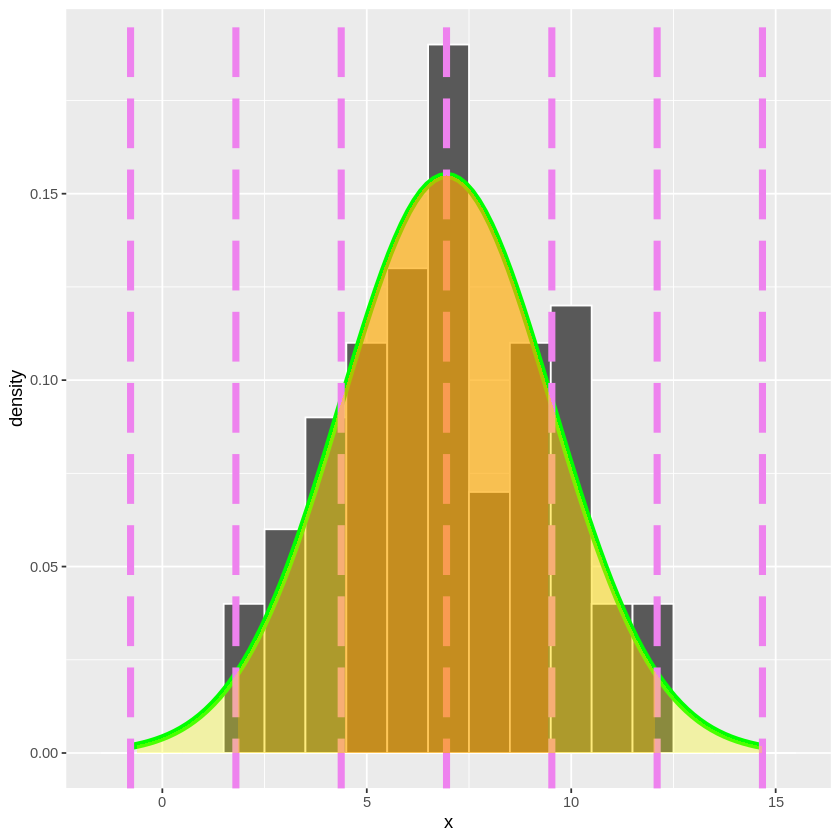

In [ ]:
# Fancy new function defined to allow for shading. 
dnorm_sd <- function(x,numsd){
  norm_sd <- dnorm(x,sum_mean, sum_sd)
  lb = sum_mean - numsd*sum_sd  #left bound 
  rb = sum_mean + numsd*sum_sd  #right bound 
  # Force NA values outside interval x in [leftbound, rightbound]:
  norm_sd[x <= lb | x >= rb] <- NA
  return(norm_sd)   #return is the result of the function dnorm_sd 
}

ggplot(
  dice_data, 
  aes(x)
  ) + 
  geom_histogram(
    aes(y=..density..),
    col="white",
    binwidth=1
    ) + 
  stat_function(      #draws bell curve
    fun=dnorm, 
    args=list(
        mean=mean(dice_data$x), 
       sd=sd(dice_data$x)
        ), 
    col = "green", 
    size = 2
    ) + 
    geom_vline(
     xintercept = sum_left,    #plots all veritcal lines at once. 
     col="violet", 
     linetype="longdash",
     size=2) +
  stat_function(      #shades in innermost region
    fun=dnorm_sd, 
    args=list(numsd = 1), 
    geom="area",
    fill="red", 
    alpha=0.3
  ) +
  stat_function(      #shades in next region
    fun=dnorm_sd, 
    args=list(numsd = 2), 
    geom="area",
    fill="orange", 
    alpha=0.3
  ) +
  stat_function(      #shades in final region
    fun=dnorm_sd, 
    args=list(numsd = 3), 
    geom="area",
    fill="yellow", 
    alpha=0.3
  ) 

Remove the vertical lines. We don't need them anymore. 

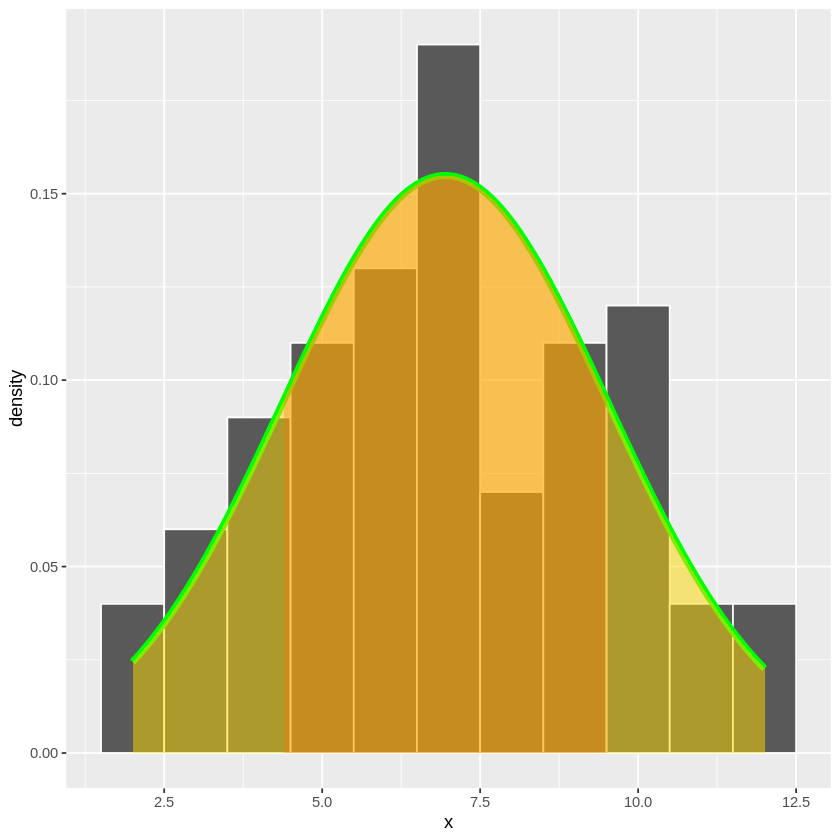

In [ ]:
# Make sure these two have been initialized for your data set. 
sum_mean=mean(dice_data$x)
sum_sd=sd(dice_data$x)


# Fancy function defined to allow for shading. 
dnorm_sd <- function(x,numsd){
  norm_sd <- dnorm(x,sum_mean, sum_sd)
  lb = sum_mean - numsd*sum_sd  #left bound 
  rb = sum_mean + numsd*sum_sd  #right bound 
  # Force NA values outside interval x in [leftbound, rightbound]:
  norm_sd[x <= lb | x >= rb] <- NA
  return(norm_sd)   #return is the result of the function dnorm_sd 
}


#starts plotting
ggplot(
  dice_data, 
  aes(x)
  ) + 
  geom_histogram(
    aes(y=..density..),
    col="white",
    binwidth=1
    ) + 
  stat_function(      #draws bell curve
    fun=dnorm, 
    args=list(
        mean=sum_mean, 
       sd=sum_sd
        ), 
    col = "green", 
    size = 2
    ) + 
  stat_function(      #shades in innermost region
    fun=dnorm_sd, 
    args=list(numsd = 1), 
    geom="area",
    fill="red", 
    alpha=0.3
  ) +
  stat_function(      #shades in next region
    fun=dnorm_sd, 
    args=list(numsd = 2), 
    geom="area",
    fill="orange", 
    alpha=0.3
  ) +
  stat_function(      #shades in final region
    fun=dnorm_sd, 
    args=list(numsd = 3), 
    geom="area",
    fill="yellow", 
    alpha=0.3
  ) 

All together now.

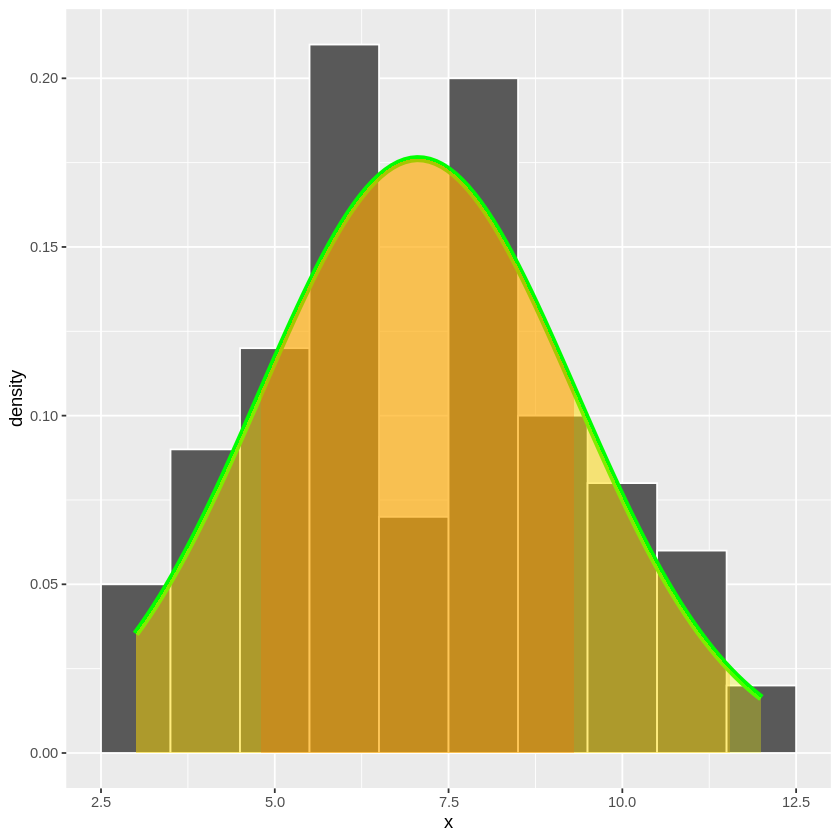

In [ ]:
#initialize dice_sums 
dice_sums <- 0 
num_rolls = 100    # pick a big number and replace 100 with your number. 

for(i in 1:num_rolls) {
  dice_sums[i] = sample(1:6,1)+sample(1:6,1)
}

dice_data <- data.frame(dice_sums)
names(dice_data) = c("x")

# Make sure these two have been initialized for your data set. 
sum_mean=mean(dice_data$x)
sum_sd=sd(dice_data$x)

play[j]=sum_mean  #ignore these two lines the first time you see them. 
j=j+1 

# Fancy function defined to allow for shading. 
dnorm_sd <- function(x,numsd){
  norm_sd <- dnorm(x,sum_mean, sum_sd)
  lb = sum_mean - numsd*sum_sd  #left bound 
  rb = sum_mean + numsd*sum_sd  #right bound 
  # Force NA values outside interval x in [leftbound, rightbound]:
  norm_sd[x <= lb | x >= rb] <- NA
  return(norm_sd)   #return is the result of the function dnorm_sd 
}

library(ggplot2)
#starts plotting
ggplot(
  dice_data, 
  aes(x)
  ) + 
  geom_histogram(
    aes(y=..density..),
    col="white",
    binwidth=1
    ) + 
  stat_function(      #draws bell curve
    fun=dnorm, 
    args=list(
        mean=sum_mean, 
       sd=sum_sd
        ), 
    col = "green", 
    size = 2
    ) + 
  stat_function(      #shades in innermost region
    fun=dnorm_sd, 
    args=list(numsd = 1), 
    geom="area",
    fill="red", 
    alpha=0.3
  ) +
  stat_function(      #shades in next region
    fun=dnorm_sd, 
    args=list(numsd = 2), 
    geom="area",
    fill="orange", 
    alpha=0.3
  ) +
  stat_function(      #shades in final region
    fun=dnorm_sd, 
    args=list(numsd = 3), 
    geom="area",
    fill="yellow", 
    alpha=0.3
  ) 

The z-score of an observation counts how many standard deviations that datum is away from the mean. This next block of code draws a violet line at the mean and a blue one at a random observation. 

It also re-simulates rolling dice 100 times each time you click the play button. 

Obs value:  10 
mean:  7.08 
z-score:  1.147227 
Percent of observances between observation and mean:  37.43562 %

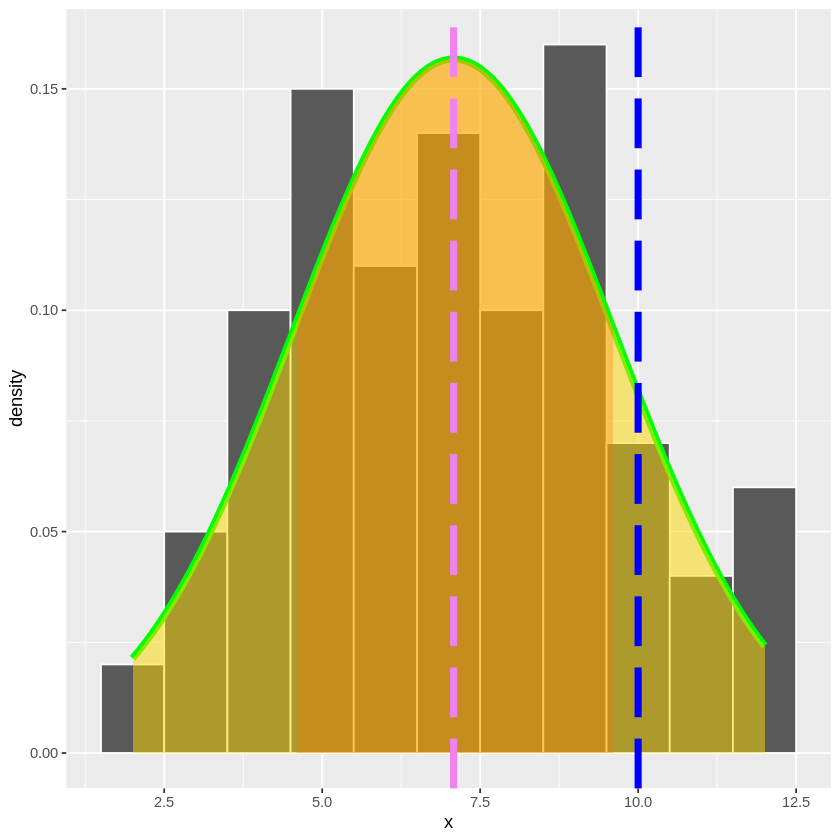

In [ ]:
#initialize dice_sums 
dice_sums <- 0 
num_rolls = 100    # pick a big number and replace 100 with your number. 

for(i in 1:num_rolls) {
  dice_sums[i] = sample(1:6,1)+sample(1:6,1)
}

dice_data <- data.frame(dice_sums)
names(dice_data) = c("x")

# Make sure these two have been initialized for your data set. 
sum_mean=mean(dice_data$x)
sum_sd=sd(dice_data$x)

play[j]=sum_mean  #ignore these two j lines the first few times you see them. 
j=j+1   

obs = c(sum_mean,dice_data$x[sample(1:100,1)])   #picks an observation at random.
obs_cols = c("violet","blue")

#calculates z-score
z_score = (obs[2]-obs[1])/sum_sd      #obs[2] pulls the observation's information and obs[1] pulls the mean of the sample. 
area=integrate(dnorm,0,z_score)
cat("Obs value: ", obs[2],"\nmean: ", obs[1], "\nz-score: ", z_score, "\nPercent of observances between observation and mean: ", 100*abs(area$value),"%")

# Fancy function defined to allow for shading. 
dnorm_sd <- function(x,numsd){
  norm_sd <- dnorm(x,sum_mean, sum_sd)
  lb = sum_mean - numsd*sum_sd  #left bound 
  rb = sum_mean + numsd*sum_sd  #right bound 
  # Force NA values outside interval x in [leftbound, rightbound]:
  norm_sd[x <= lb | x >= rb] <- NA
  return(norm_sd)   #return is the result of the function dnorm_sd 
}


#starts plotting
ggplot(
  dice_data, 
  aes(x)
  ) + 
  geom_histogram(
    aes(y=..density..),
    col="white",
    binwidth=1
    ) + 
  stat_function(      #draws bell curve
    fun=dnorm, 
    args=list(
        mean=sum_mean, 
       sd=sum_sd
        ), 
    col = "green", 
    size = 2
    ) + 
  stat_function(      #shades in innermost region
    fun=dnorm_sd, 
    args=list(numsd = 1), 
    geom="area",
    fill="red", 
    alpha=0.3
  ) +
  stat_function(      #shades in next region
    fun=dnorm_sd, 
    args=list(numsd = 2), 
    geom="area",
    fill="orange", 
    alpha=0.3
  ) +
  stat_function(      #shades in final region
    fun=dnorm_sd, 
    args=list(numsd = 3), 
    geom="area",
    fill="yellow", 
    alpha=0.3
  ) +
  geom_vline(
    xintercept=obs, 
    linetype="longdash", 
    col=obs_cols,
    size=2
  )

Did you click play a few times at 100 and see what happens to the blue line and the z-score in relation to the shaded regions? 

z-score * sd = obs - mean 





In [ ]:
# How do you use a z-score to go backwards? 

The variable, play, has been collecting the mean of all of the samples you generated earlier. 

In [ ]:
sample_data <- data.frame("average.sample.sum"=play)
#sample_data 
#summary(sample_data)
str(sample_data)

'data.frame':	1 obs. of  1 variable:
 $ average.sample.sum: num 7.08


Warning message:
“Computation failed in `stat_bin()`:
`binwidth` must be positive”


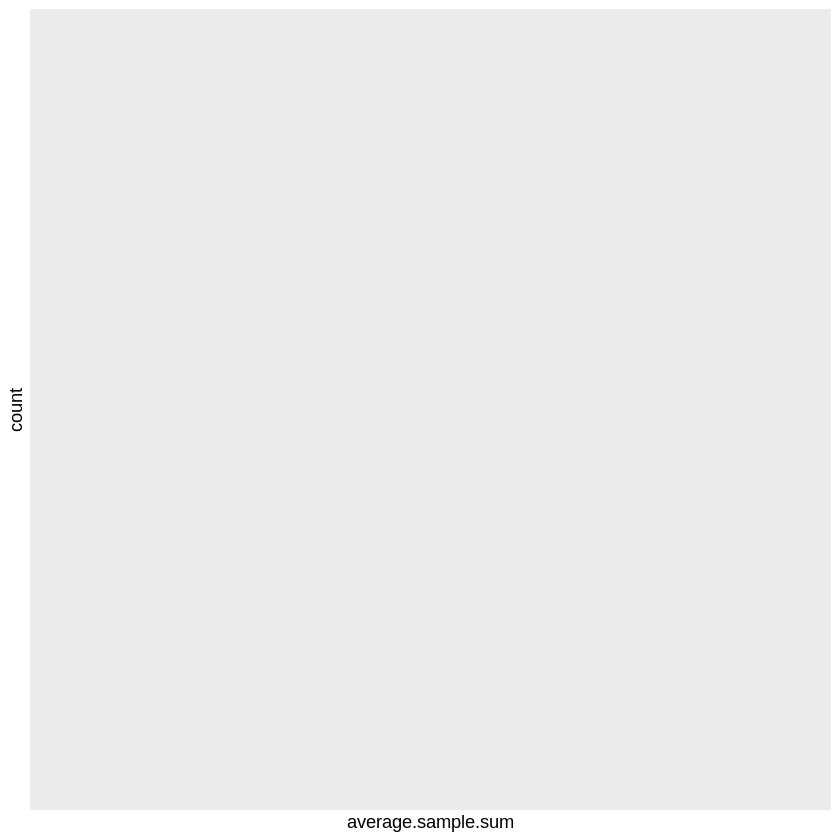

In [ ]:
samples_max=max(sample_data$average.sample.sum)
samples_min=min(sample_data$average.sample.sum)
samples_mean=mean(sample_data$average.sample.sum)
samples_sd=sd(sample_data$average.sample.sum)
samples_buckets=(samples_max-samples_min)/10 # to make 10+1=11 buckets in a histogram.

ggplot(
  sample_data, 
  aes(average.sample.sum)
  ) + 
  geom_histogram(
 #   aes(y=..density..),
    col="white",
    binwidth=samples_buckets
    )

I'm tried of clicking play. Let's pretend to have done this 1000 times. 

This block of code takes more than an instant run time. Be patient with R. 

'data.frame':	1500 obs. of  1 variable:
 $ average.sample.sum: num  7.13 7.28 7.12 7.05 7.03 6.89 6.85 6.92 7.21 6.78 ...


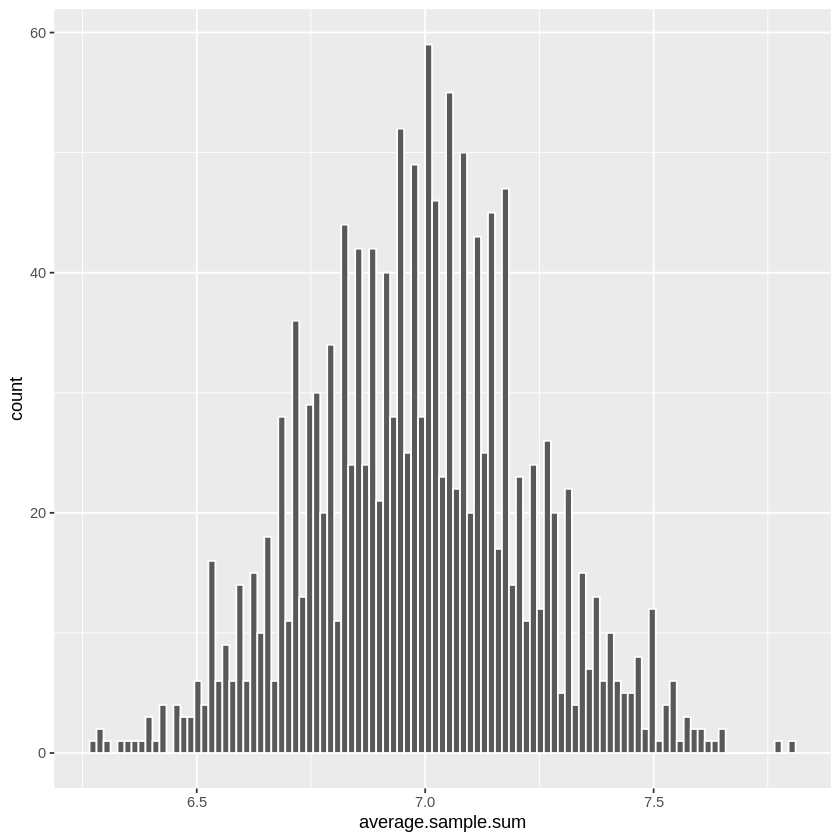

In [ ]:
#fast forward. 
dice_sums <- 0 
num_rolls = 100 
clicks=1500

#j=1    # if starting from scratch uncomment this line to initialize j. 

for(k in j:clicks){
    for(i in 1:num_rolls) {
      dice_sums[i] = sample(1:6,1)+sample(1:6,1)
    }
    play[k]=mean(dice_sums)
  }

sample_data <- data.frame("average.sample.sum"=play)
#sample_data 
#summary(sample_data)
str(sample_data)

samples_max=max(sample_data$average.sample.sum)
samples_min=min(sample_data$average.sample.sum)
samples_mean=mean(sample_data$average.sample.sum)
samples_sd=sd(sample_data$average.sample.sum)
samples_buckets=(samples_max-samples_min)/100 # to make 100+1=101 buckets in a histogram.

ggplot(
  sample_data, 
  aes(average.sample.sum)
  ) + 
  geom_histogram(
 #   aes(y=..density..),
    col="white",
    binwidth=samples_buckets
    )

How do you draw a normal curve on top of the sample_data$average.sample.sum graph?

In [ ]:
# Figure it out together.